In [12]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x:ast.literal_eval(x) if pd.notna(x) else x)

In [13]:
import seaborn as sns

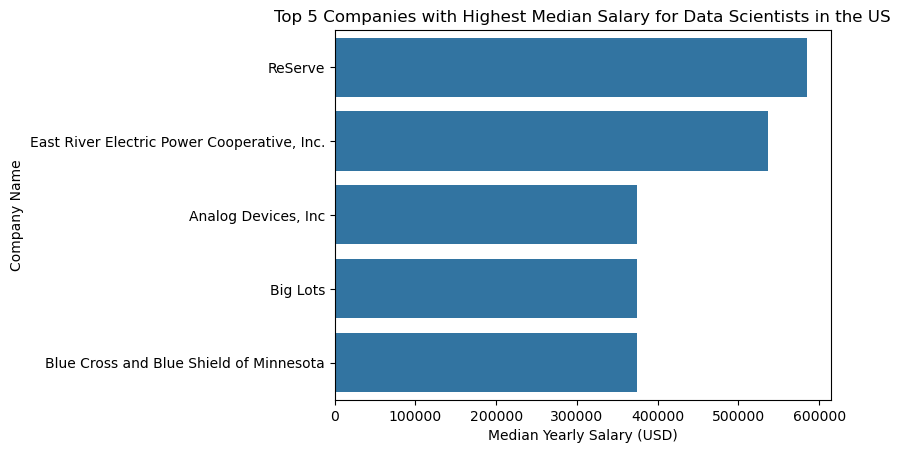

In [15]:
#Top Companies Bar Plot
#Create a Seaborn bar plot to visualize the top 5 companies with the highest median salary_year_avg for Data Scientist job postings in the United States.

df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset= 'salary_year_avg').copy()
filtered = df_DS_US.groupby('company_name')['salary_year_avg'].median().nlargest(5).reset_index()

#sns.barplot(filtered)
sns.barplot(data=filtered, x='salary_year_avg', y='company_name')
plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.xlabel('Median Yearly Salary (USD)')
plt.ylabel('Company Name')
plt.show()


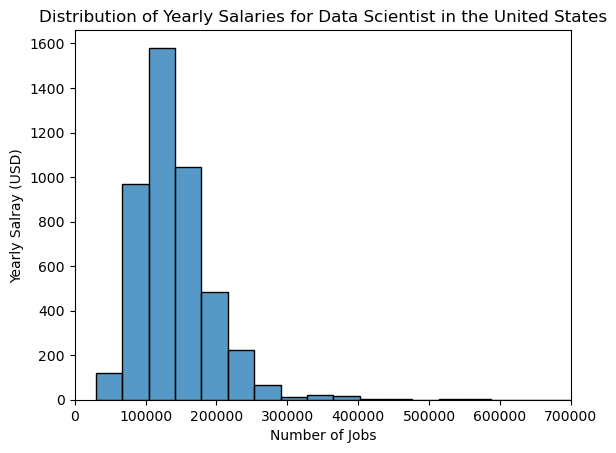

In [16]:
#Data Scientist Salary Histogram
#Create a histogram using Seaborn to visualize the distribution of average yearly salaries (use the salary_year_avg column) for Data Scientist job postings in the United States:

#Filter the DataFrame to include only job postings in the United States and remove any entries with missing yearly salary values.
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset= 'salary_year_avg').copy()

sns.histplot(df_DS_US['salary_year_avg'], bins = 25)
plt.xlim(0, 700000)
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.ylabel('Yearly Salray (USD)')
plt.xlabel('Number of Jobs')
plt.show()

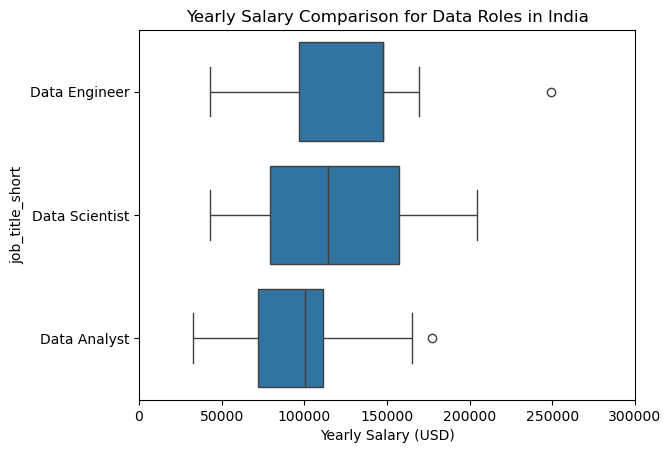

In [31]:
#Data Roles Salary Box Plot
#Create a box plot using Seaborn to compare the yearly salaries (use the salary_year_avg column) of Data Analyst, Data Engineer, and Data Scientist job postings in India:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']
df_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].dropna(subset = 'salary_year_avg').copy()
#job_list = [df_IN[df_IN['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]

sns.boxplot(data = df_IN, x = 'salary_year_avg', y = 'job_title_short')
plt.xlim(0,300000)
plt.xlabel('Yearly Salary (USD)')
plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.show()


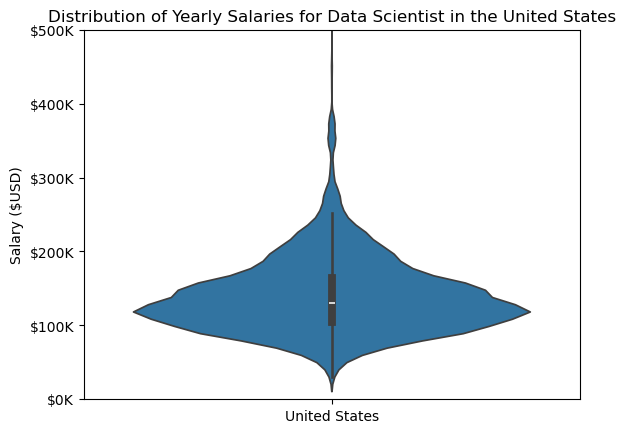

In [38]:
#Salary Distribution for United States
#Create a violin plot using Seaborn to visualize the distribution of salary_year_avg for Data Scientist roles in the United States.
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].dropna(subset= 'salary_year_avg').copy()

sns.violinplot(data = df_DS_US, x= 'job_country', y = 'salary_year_avg')
plt.title('Distribution of Yearly Salaries for Data Scientist in the United States')
plt.ylim(0,500000)
plt.xlabel('')
plt.ylabel('Salary ($USD)')
ticks_y = plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K')
plt.gca().yaxis.set_major_formatter(ticks_y)
plt.show()